In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from glob import glob
import pickle
import tensorflow
from scipy import stats

In [2]:
#Path to the dataset 
FOLDER_PATH = 'data/'
#get all files within the path
files_list = sorted(glob(FOLDER_PATH + '*'))   
print(files_list)

['data\\s01.dat', 'data\\s02.dat', 'data\\s03.dat', 'data\\s04.dat', 'data\\s05.dat', 'data\\s06.dat', 'data\\s07.dat', 'data\\s08.dat', 'data\\s09.dat', 'data\\s10.dat', 'data\\s11.dat', 'data\\s12.dat', 'data\\s13.dat', 'data\\s14.dat', 'data\\s15.dat', 'data\\s16.dat', 'data\\s17.dat', 'data\\s18.dat', 'data\\s19.dat', 'data\\s20.dat', 'data\\s21.dat', 'data\\s22.dat', 'data\\s23.dat', 'data\\s24.dat', 'data\\s25.dat', 'data\\s26.dat', 'data\\s27.dat', 'data\\s28.dat', 'data\\s29.dat', 'data\\s30.dat', 'data\\s31.dat', 'data\\s32.dat']


In [3]:

#Original shape of DEAP dataset 32 = participants, 40 = clips / person, 40 = channels, 8064 = signals each 
#total samples of 8064 * 1280 = 10,321,920
org_data = np.zeros((32,40,40,8064))

#Original shape of the labels 32 = participants, 40 = clips, 4 = targets = Valence, Arousal, Dominance, Likeness
org_labels = np.zeros((32,40,4))

for i, f in (enumerate(tqdm(files_list))):
      with open(f, 'rb') as f: 
        content = pickle.load(f, encoding='iso-8859-1')
        data = content['data']
        labels = content['labels'] 
        org_data[i] = data
        org_labels[i] = labels
        

100%|██████████| 32/32 [00:13<00:00,  2.45it/s]


In [4]:
print(f"Original Shape of the data: {org_data.shape}")
print(f"Original Shape of the labels:{org_labels.shape}")

Original Shape of the data: (32, 40, 40, 8064)
Original Shape of the labels:(32, 40, 4)


In [5]:
signals = ['Fp1', 'AF3', 'F3', 'F7', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'P3', 'P7', 'PO3', 'O1', 'Oz', 'Pz', 'Fp2', 'AF4', 'Fz', 'F4', 'F8', 'FC6', 'FC2', 'Cz', 'C4', 'T8', 'CP6', 'CP2', 'P4', 'P8', 'PO4', 'O2', 'hEOG (horizontal EOG, hEOG1 - hEOG2)', 'vEOG (vertical EOG, vEOG1 - vEOG2)', 'zEMG (Zygomaticus Major EMG, zEMG1 - zEMG2)', 'tEMG (Trapezius EMG, tEMG1 - tEMG2)', 'GSR (values from Twente converted to Geneva format (Ohm))', 'Respiration belt', 'Plethysmograph', 'Temperature']
eeg_signals = signals[:32]
phy_signals = signals[32:]
labels = ['valence', 'arousal', 'dominance', 'liking']

print(f"EEG signals: {eeg_signals}")
print(f"Physiological signals : {phy_signals}")

EEG signals: ['Fp1', 'AF3', 'F3', 'F7', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'P3', 'P7', 'PO3', 'O1', 'Oz', 'Pz', 'Fp2', 'AF4', 'Fz', 'F4', 'F8', 'FC6', 'FC2', 'Cz', 'C4', 'T8', 'CP6', 'CP2', 'P4', 'P8', 'PO4', 'O2']
Physiological signals : ['hEOG (horizontal EOG, hEOG1 - hEOG2)', 'vEOG (vertical EOG, vEOG1 - vEOG2)', 'zEMG (Zygomaticus Major EMG, zEMG1 - zEMG2)', 'tEMG (Trapezius EMG, tEMG1 - tEMG2)', 'GSR (values from Twente converted to Geneva format (Ohm))', 'Respiration belt', 'Plethysmograph', 'Temperature']


In [6]:
#Combining clips / person we get 32 * 40 = 1280 
eeg_data = org_data.reshape(-1, 40, 8064)
#Also taking only 32 channels as 32 are EEG signals and 8 are physiological signals
eeg_data = eeg_data[:,:32,:]

print(f"Proper EEG data shape: {eeg_data.shape}")

Proper EEG data shape: (1280, 32, 8064)


In [7]:
#Reshaping the labels data to 1280, 4
eeg_labels = org_labels.reshape(-1, 4)
print("EEG Labels shape: " , eeg_labels.shape)

EEG Labels shape:  (1280, 4)


In [8]:
# The DEAP dataset contains frequency power of trails and baselines btween 3 and 47 Hz, So we can use only 4 frequncy bands Theta, Alpha, Beta, Gamma
theta_band = [3, 7]
alpha_band = [8, 13]
beta_band = [14, 29]
gamma_band = [30, 47]

print(f"Theta Band: high : {theta_band[1]}, low: {theta_band[0]}")
print(f"Alpha Band: high : {alpha_band[1]}, low: {alpha_band[0]}")
print(f"Beta Band: high : {beta_band[1]}, low: {beta_band[0]}")
print(f"Gamma Band: high : {gamma_band[1]}, low: {gamma_band[0]}")

Theta Band: high : 7, low: 3
Alpha Band: high : 13, low: 8
Beta Band: high : 29, low: 14
Gamma Band: high : 47, low: 30


(1280, 32, 8064)


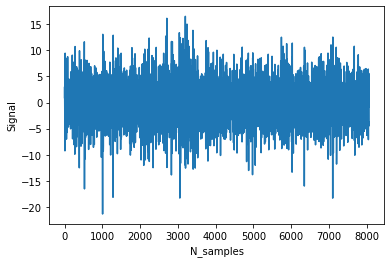

In [9]:
 
plt.plot(eeg_data[0][0])
plt.xlabel("N_samples")
plt.ylabel("Signal")
print(eeg_data.shape)

In [10]:
from scipy import signal
from scipy.signal import welch
from scipy.integrate import simps
from scipy.stats import f_oneway
def bandpower(data, sf, band, window_sec=None, relative=False):
    band = np.asarray(band)
    low, high = band
     
    return bp

In [11]:
from mne import time_frequency
#Testing the Short Term Fourier Transform on the EEG data
xx = time_frequency.stft(eeg_data[1], wsize=128)   
 
de = []
print(f"The shape of the STFT: {xx.shape} \n i.e. for 1 sample from the eeg data the 32 channels with 8064 signals \n have been cut to 129 frequency signals with 63 small time steps, as in 129 * 63 ~ 8064 ")
for i in xx: 
    de.append(stats.differential_entropy(i))
    
de = np.array(de)
print(de.shape) 

Number of frequencies: 65
Number of time steps: 126
The shape of the STFT: (32, 65, 126) 
 i.e. for 1 sample from the eeg data the 32 channels with 8064 signals 
 have been cut to 129 frequency signals with 63 small time steps, as in 129 * 63 ~ 8064 
(32, 126)


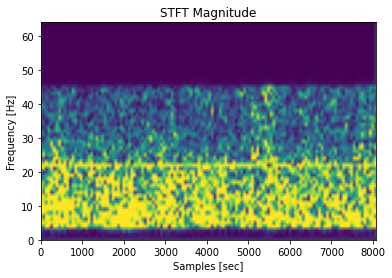

In [12]:
plt.pcolormesh(np.linspace(0, 8064 , num= xx.shape[2]),
               np.linspace(0, 64 , num= xx.shape[1]),
               np.abs(xx[0])
               ,vmin=0, 
               vmax=4, 
               shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Samples [sec]')
plt.show()

In [13]:
# Transforming the data using the Short Term Fourier Transform
stft_data = np.zeros([1280, 32, 65, 126])
for i in tqdm(range(eeg_data.shape[0])):
    stft = time_frequency.stft(eeg_data[i], wsize=128, verbose=False);
#     de = []
#     for j in stft:
#         de.append(stats.differential_entropy(j))
#     de = np.array(de)  
    stft_data[i] = stft #Taking only the positive frequencies


  0%|          | 0/1280 [00:00<?, ?it/s]C:\Users\Amanda\AppData\Local\Temp/ipykernel_29076/1889107556.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  stft_data[i] = stft #Taking only the positive frequencies
100%|██████████| 1280/1280 [00:42<00:00, 29.97it/s]


Text(0.5, 1.0, 'Time Frequency Plot of signal Fp1 of the first participant')

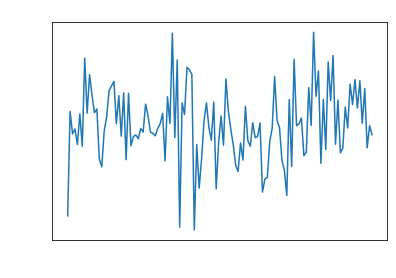

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)


ax.plot(stft_data[0][0][0]);
ax.set_xlabel("Time (s)")
ax.set_ylabel("Frequecy")
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color("white")
ax.set_title("Time Frequency Plot of signal Fp1 of the first participant")

C:\Users\Amanda\AppData\Local\Temp/ipykernel_29076/4031883917.py:1: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=126).
  plt.specgram(stft_data[0][0][0], cmap = "plasma");


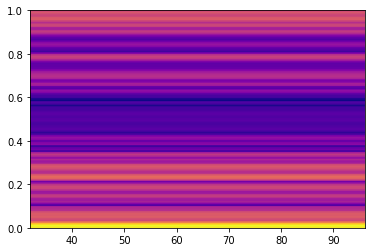

In [15]:
plt.specgram(stft_data[0][0][0], cmap = "plasma");

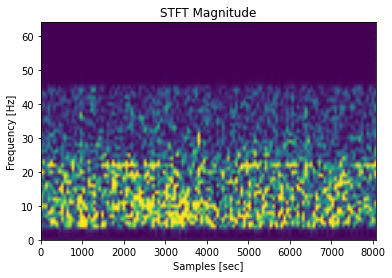

In [16]:
viz_data = stft_data[0]

plt.pcolormesh(np.linspace(0, 8064 , num= viz_data.shape[2]),
               np.linspace(0, 64 , num= viz_data.shape[1]),
               np.abs(viz_data[0])
               ,vmin=0, 
               vmax=4, 
               shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Samples [sec]')
plt.show()

In [17]:
stft_data[0].shape

(32, 65, 126)

In [18]:
print(f"EEG Labels Shape: {eeg_labels.shape}")

EEG Labels Shape: (1280, 4)


In [19]:
#Creating a DataFrame of the labels
labels_df = pd.DataFrame({"Valence" : eeg_labels[:,0], "Arousal" : eeg_labels[:,1], "Dominance" : eeg_labels[:, 2]})

print(f"Labels Shape: {labels_df.shape}")
labels_df.head()

Labels Shape: (1280, 3)


,Valence,Arousal,Dominance
0,7.71,7.60,6.90
1,8.10,7.31,7.28
2,8.58,7.54,9.00
3,4.94,6.01,6.12
4,6.96,3.92,7.19


In [20]:
np_labels = np.array(labels_df)

#One Hot Encoding the labels
label_encoded = (labels_df > labels_df.mean(axis=0)).astype(int)
        

In [21]:
 print(label_encoded.head())

   Valence  Arousal  Dominance
0        1        1          1
1        1        1          1
2        1        1          1
3        0        1          1
4        1        0          1


In [22]:
print(stft_data.shape)
print(label_encoded.shape)

(1280, 32, 65, 126)
(1280, 3)


In [23]:
n_samples = stft_data.shape[0]
n_timesteps = stft_data.shape[1]
n_freq = stft_data.shape[2] 
 

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = stft_data.reshape(-1, 32, 65 * 126)
y = label_encoded.iloc[:, 0]

print(X.shape)
#Spliting data to train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

(1280, 32, 8190)


In [26]:
X = eeg_data
y = label_encoded.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [27]:
print(f"X_train shape : {X_train.shape}")
print(f"X_test shape : {X_test.shape}")
print(f"y_train shape : {y_train.shape}")
print(f"y_test shape : {y_test.shape}")
 

X_train shape : (896, 32, 8064)
X_test shape : (384, 32, 8064)
y_train shape : (896,)
y_test shape : (384,)


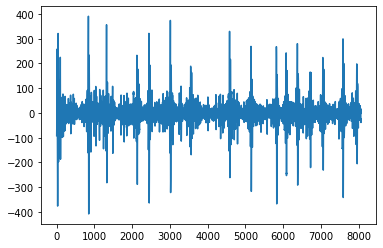

In [28]:
plt.plot(X_train[0][0]);

In [29]:
import math
from keras.models import Sequential
from keras.layers import Dense, Conv3D, Dropout, MaxPooling3D, ConvLSTM2D
from keras.layers import LSTM,BatchNormalization,Activation
import datetime
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers import RMSprop,Adam

In [30]:
# create and fit the LSTM network 
model = Sequential()
 

model.add(LSTM(512, batch_input_shape = (None, 32, X_train.shape[2]),return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(LSTM(128,activation="relu",return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.25)) 

model.add(LSTM(64,activation="relu"))  
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(10))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

adam = Adam(learning_rate=1e-5, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-5, amsgrad=False)
model.compile(loss='binary_crossentropy', optimizer="adam") 
model.summary()


log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32, 512)           17565696  
                                                                 
 batch_normalization (BatchN  (None, 32, 512)          2048      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32, 512)           0         
                                                                 
 lstm_1 (LSTM)               (None, 32, 128)           328192    
                                                                 
 batch_normalization_1 (Batc  (None, 32, 128)          512       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 32, 128)           0

In [31]:
history = model.fit(X_train, y_train, epochs=100, batch_size=150, verbose=2, validation_split=0.3)

Epoch 1/100
5/5 - 48s - loss: 0.7899 - val_loss: 0.6973 - 48s/epoch - 10s/step
Epoch 2/100
5/5 - 30s - loss: 0.5940 - val_loss: 0.6933 - 30s/epoch - 6s/step
Epoch 3/100
5/5 - 24s - loss: 0.5018 - val_loss: 0.6903 - 24s/epoch - 5s/step
Epoch 4/100
5/5 - 23s - loss: 0.4685 - val_loss: 0.6888 - 23s/epoch - 5s/step
Epoch 5/100
5/5 - 23s - loss: 0.4147 - val_loss: 0.6881 - 23s/epoch - 5s/step
Epoch 6/100
5/5 - 23s - loss: 0.3315 - val_loss: 0.6863 - 23s/epoch - 5s/step
Epoch 7/100
5/5 - 24s - loss: 0.2641 - val_loss: 0.6859 - 24s/epoch - 5s/step
Epoch 8/100
5/5 - 23s - loss: 0.2068 - val_loss: 0.6889 - 23s/epoch - 5s/step
Epoch 9/100
5/5 - 23s - loss: 0.1651 - val_loss: 0.6900 - 23s/epoch - 5s/step
Epoch 10/100
5/5 - 23s - loss: 0.1306 - val_loss: 0.6942 - 23s/epoch - 5s/step
Epoch 11/100
5/5 - 23s - loss: 0.1032 - val_loss: 0.7002 - 23s/epoch - 5s/step
Epoch 12/100
5/5 - 23s - loss: 0.0846 - val_loss: 0.7046 - 23s/epoch - 5s/step
Epoch 13/100
5/5 - 24s - loss: 0.0597 - val_loss: 0.7154 - 2

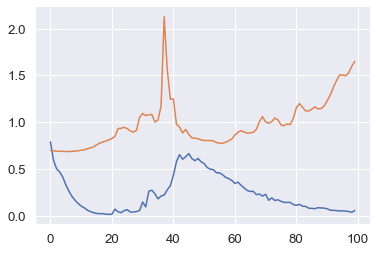

In [32]:
import seaborn as sns
sns.set(font_scale=1.2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
sns.despine()

In [33]:
from tensorflow import keras
model = keras.models.load_model('model3lstm2Dense.h5')

In [34]:
yhat = model.predict(X_test)

In [35]:
pred = np.where(yhat >= 0.5, 1, 0)

In [36]:
pred = np.ravel(pred) 

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

Accuracy score of Valence 
73.17708333333334


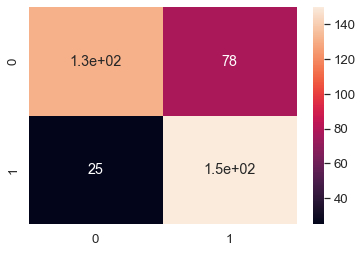

In [38]:
cm = confusion_matrix(y_test, pred) 
import seaborn as sns
sns.heatmap(cm, annot=True)
print("Accuracy score of Valence ")
print(accuracy_score(y_test, pred)*100)

In [39]:
# import pickle
# filename = './saves/modellstm.sav'
# file = open(filename, 'wb')
# pickle.dump(model, file)

In [40]:
model.save("model3lstm2Dense.h5")

In [41]:
# create and fit the LSTM network 
model = Sequential()
 

model.add(LSTM(128, batch_input_shape = (None, 32, X_train.shape[2]),return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.5)) 

model.add(LSTM(64,activation="relu", return_sequences=True)) 
model.add(BatchNormalization())
model.add(Dropout(0.25)) 
 
model.add(LSTM(32,activation="relu")) 
model.add(BatchNormalization())
model.add(Dropout(0.25)) 

model.add(Dense(1))
model.add(Activation('sigmoid'))

adam = Adam(learning_rate=1e-5, beta_1=0.9, beta_2=0.999, decay = 1e-5, epsilon=None, amsgrad=False)
model.compile(loss='binary_crossentropy', optimizer= adam) 
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 32, 128)           4194816   
                                                                 
 batch_normalization_3 (Batc  (None, 32, 128)          512       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 32, 128)           0         
                                                                 
 lstm_4 (LSTM)               (None, 32, 64)            49408     
                                                                 
 batch_normalization_4 (Batc  (None, 32, 64)           256       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 32, 64)           

In [42]:
history = model.fit(X_train, y_train, epochs=100, batch_size=300, verbose=2, validation_split=0.3)

Epoch 1/100
3/3 - 17s - loss: 0.8675 - val_loss: 0.6932 - 17s/epoch - 6s/step
Epoch 2/100
3/3 - 6s - loss: 0.8303 - val_loss: 0.6935 - 6s/epoch - 2s/step
Epoch 3/100
3/3 - 6s - loss: 0.7799 - val_loss: 0.6939 - 6s/epoch - 2s/step
Epoch 4/100
3/3 - 6s - loss: 0.7781 - val_loss: 0.6942 - 6s/epoch - 2s/step
Epoch 5/100
3/3 - 6s - loss: 0.7419 - val_loss: 0.6947 - 6s/epoch - 2s/step
Epoch 6/100
3/3 - 6s - loss: 0.7796 - val_loss: 0.6952 - 6s/epoch - 2s/step
Epoch 7/100
3/3 - 5s - loss: 0.7493 - val_loss: 0.6958 - 5s/epoch - 2s/step
Epoch 8/100
3/3 - 6s - loss: 0.6930 - val_loss: 0.6962 - 6s/epoch - 2s/step
Epoch 9/100
3/3 - 6s - loss: 0.6960 - val_loss: 0.6968 - 6s/epoch - 2s/step
Epoch 10/100
3/3 - 6s - loss: 0.6783 - val_loss: 0.6973 - 6s/epoch - 2s/step
Epoch 11/100
3/3 - 6s - loss: 0.6342 - val_loss: 0.6978 - 6s/epoch - 2s/step
Epoch 12/100
3/3 - 6s - loss: 0.6605 - val_loss: 0.6983 - 6s/epoch - 2s/step
Epoch 13/100
3/3 - 5s - loss: 0.6466 - val_loss: 0.6987 - 5s/epoch - 2s/step
Epoch 

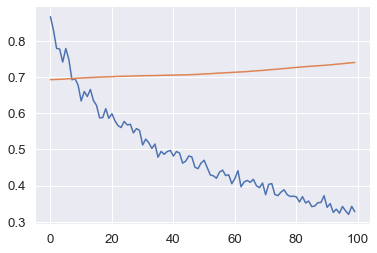

In [43]:
import seaborn as sns
sns.set(font_scale=1.2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
sns.despine()

In [44]:
yhat = model.predict(X_test)

In [45]:
yhat.shape

(384, 1)

In [46]:
pred = np.where(yhat >= 0.5, 1, 0)
pred = np.ravel(pred) 

Accuracy score of Valence 
50.78125


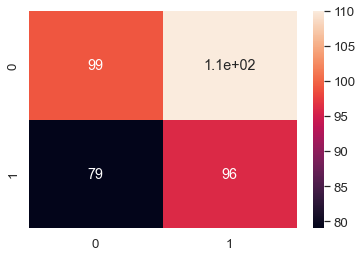

In [47]:
cm = confusion_matrix(y_test, pred) 
import seaborn as sns
sns.heatmap(cm, annot=True)
print("Accuracy score of Valence ")
print(accuracy_score(y_test, pred)*100)